In [1]:
%matplotlib inline

In [257]:
#Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import scipy.stats as sts

In [8]:
city_df=pd.read_csv('Resources/city_data.csv')
ride_df=pd.read_csv('Resources/ride_data.csv')

In [11]:
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [14]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [16]:
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [17]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [19]:
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [22]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [23]:
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [161]:
sum(city_df['type']=="Urban"),sum(city_df['type']=="Suburban"),sum(city_df['type']=="Rural")

(66, 36, 18)

In [32]:
df=pd.merge(ride_df,city_df,on=["city","city"])

In [33]:
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [30]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [31]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [38]:
urban_cities_df=df[df["type"]=="Urban"]
suburban_cities_df=df[df["type"]=="Suburban"]
rural_cities_df=df[df["type"]=="Rural"]

In [45]:
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]

In [50]:
urban_avg_fare=urban_cities_df.groupby("city").mean()["fare"].round(2)
suburban_avg_fare=suburban_cities_df.groupby("city").mean()["fare"].round(2)
rural_avg_fare=rural_cities_df.groupby("city").mean()["fare"].round(2)


In [52]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [55]:
urban_avg_driver=urban_cities_df.groupby("city").mean()['driver_count']
suburban_avg_driver=suburban_cities_df.groupby("city").mean()['driver_count']
rural_avg_driver=rural_cities_df.groupby("city").mean()['driver_count']

Text(42, 35, 'Note:\n Circle size correlates \n with driver count per city.')

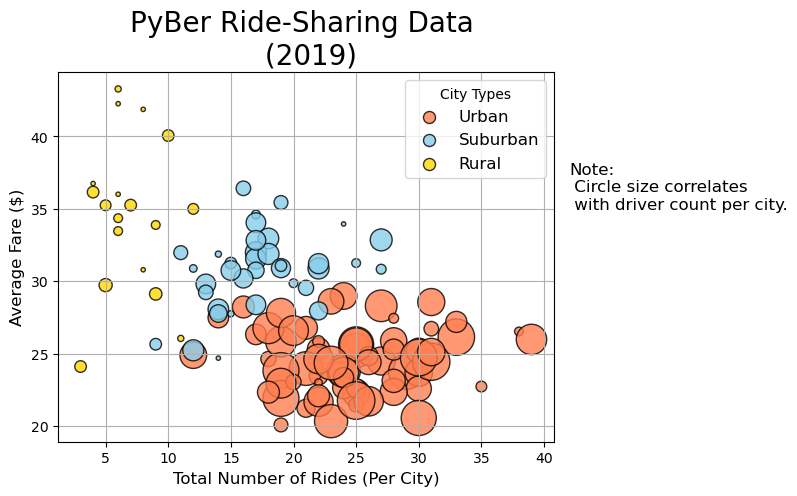

In [82]:
fig,ax=plt.subplots()
ax.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_avg_driver,
           color="coral",
           edgecolor="black",
           alpha=0.8,
           label="Urban"
          )

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_avg_driver,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban"
           )

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_avg_driver,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural"
           )

ax.set_title("PyBer Ride-Sharing Data \n (2019)",fontsize=20)
ax.set_xlabel("Total Number of Rides (Per City)",fontsize=12)
ax.set_ylabel("Average Fare ($)",fontsize=12)
ax.grid()


lgnd = ax.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(10)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\n Circle size correlates \n with driver count per city.", fontsize="12")

In [84]:
# Save the figure.
plt.savefig("Analysis/Fig1.png")

<Figure size 640x480 with 0 Axes>

In [85]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [88]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [90]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [95]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [102]:
round(urban_ride_count.mode(),2)

0    22
1    25
Name: ride_id, dtype: int64

In [122]:
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [133]:
np.unique(suburban_ride_count,return_counts=True)

(array([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27]),
 array([1, 1, 2, 2, 4, 3, 2, 7, 2, 3, 1, 1, 3, 1, 1, 2]))

In [139]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

In [138]:
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,Barronchester,2019-05-05 04:03:11,30.38,2281522828169,11,Suburban
1627,Barronchester,2019-04-25 19:11:43,36.13,2660177707065,11,Suburban
1628,Barronchester,2019-03-31 06:05:30,44.24,1252888806772,11,Suburban
1629,Barronchester,2019-03-02 23:36:58,36.49,4031573980778,11,Suburban
...,...,...,...,...,...,...
2245,East Danielview,2019-03-04 04:10:30,17.89,7640214407429,22,Suburban
2246,East Danielview,2019-04-26 08:14:46,40.76,2970656303504,22,Suburban
2247,East Danielview,2019-02-04 11:01:24,38.38,2528683882693,22,Suburban
2248,East Danielview,2019-03-27 16:22:09,36.00,1410739354876,22,Suburban


In [145]:
urban_fares=urban_cities_df["fare"]
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]

In [141]:
urban_fares

0       13.83
1       31.25
2       19.89
3       24.28
4       13.89
        ...  
1620    40.17
1621    17.03
1622     5.58
1623    28.13
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [146]:
np.mean(urban_fares),np.mean(suburban_fares),np.mean(rural_fares)

(24.525772307692307, 30.970127999999992, 34.62344)

In [163]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [166]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers

1625    11
1626    11
1627    11
1628    11
1629    11
        ..
2245    22
2246    22
2247    22
2248    22
2249    22
Name: driver_count, Length: 625, dtype: int64

In [167]:
np.mean(suburban_drivers)

13.712

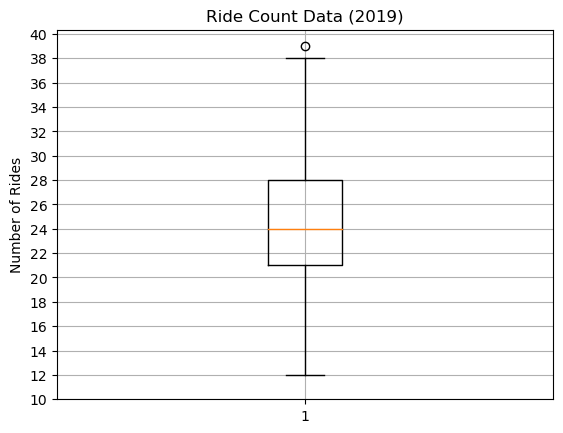

In [174]:
# Create a box-and-whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count)
# Add the title, x-axis label,y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_xlabel("Urban")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

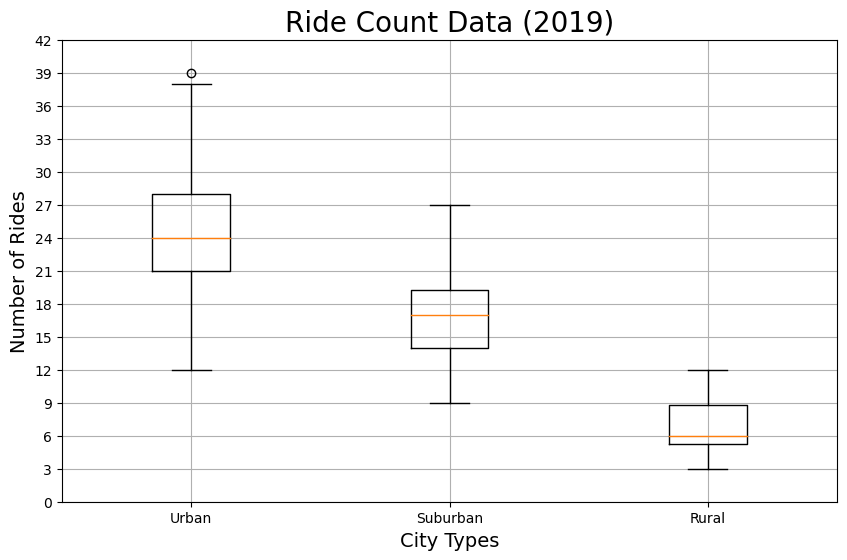

In [177]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [179]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [180]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [182]:
urban_cities_df["fare"].sum()

39854.38

In [192]:
fare_count=[0]*3
fare_count

[0, 0, 0]

In [203]:
# Get the sum of the fares for each city type.
sum_fares_by_type = df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [226]:
total_fare=df["fare"].sum()
total_fare
type_percents = round(100 * df.groupby(["type"]).sum()["fare"] / df["fare"].sum(),2)

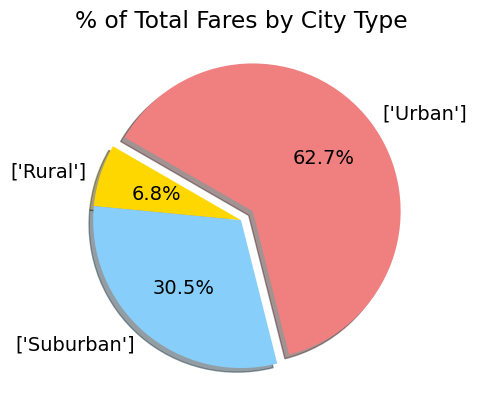

In [259]:
fig1,ax=plt.subplots()
#xlabels=df["type"].unique()
xlabels=df.groupby("type")['type'].unique()
ax.pie(type_percents,
       labels=xlabels,
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150
      )
ax.set_title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [262]:
total_rides=df["ride_id"].count()
total_rides

2375

In [267]:
sum_rides_bytype=df.groupby("type")["driver_count"].count()
sum_rides_bytype

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [269]:
percent_ride_bytype=round(100*df.groupby("type")["driver_count"].count()/df["ride_id"].count(),2)
percent_ride_bytype

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: driver_count, dtype: float64

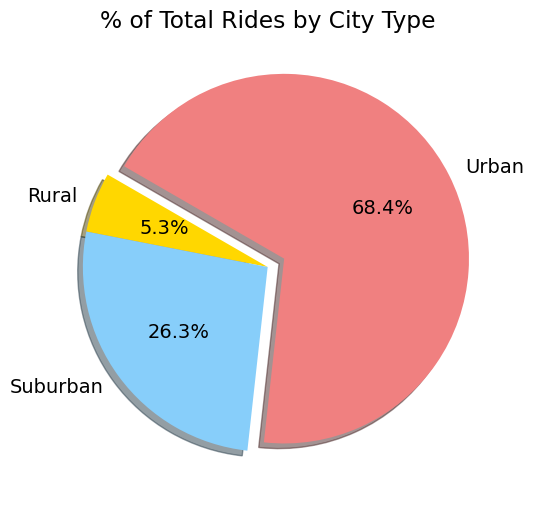

In [271]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(percent_ride_bytype,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()